### Student Details

Student name: Pierre-Louis JALLERAT

Student ID: 21181659

# Option 1: Logistic Regression and Multi-Class with scikit-learn

In [1]:
# import dependencies
import numpy as np
import matplotlib.pyplot as plt

## Part 2: Probabilistic Output

Wait, logistic regression is called regression for a reason. But we have implemented a classification? So let's remove the classification part and simply look at the probability output of logistic regression.

1. Adapt the LogisticRegression class to output probabilities rather than a binary class label. Note that the output of the sigmoid is interpretted as a probability.
2. Train on the same data as above
3. Generate several thousand examples (e.g. 5000) within a valid range (e.g. in this case, both axes between 3 and 8 and 0 and 6 respectively). Make sure the generation is uniform.
4. Predict the probability for each of our random samples
5. Provide a scatter plots of our random samples, with the colour showing the probability (you can just use `c=probas` assuming `probas` is the output of the algorithm, which will provide a scaling from blue to yellow)

In [2]:
# import dependencies
import numpy as np
import matplotlib.pyplot as plt

In [3]:
################################
# Class stub for you to fill the rest of the code
import math

class LogisticRegressionGD(object):
    def __init__(self, eta=0.01, epochs=50):
        self.eta = eta
        self.epochs = epochs

    def train(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []

        for i in range(self.epochs):
            output = self.activation(self.net_input(X))
            errors = y.T - output
            buf = self.eta * errors.dot(X)
            self.w_[1:] += buf.reshape(2,)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)

        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, z):
        z = np.clip(z, -250, 250)
        return 1 / (1 + np.exp(-z))

    def predict(self, X):
        return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)
        
    def probability(self, X):
      return self.activation(self.net_input(X))

In [69]:
import pandas as pd

data = pd.read_csv('iris_data.csv')
data = data[data[' class'].isin(['Iris-setosa', 'Iris-versicolor'])]
X = data[['sepal_length', ' petal_length']]
y = data[[' class']] 

# y is the Labels in our dataset, converted to integers
y = np.where(y == "Iris-setosa", 0, 1)
X = np.array(X)
y = np.array(y)

In [70]:
#Train our Logistic Regression model

LR_GD = LogisticRegressionGD()
LR_GD.train(X, y)

Ploting the probability of having an Iris-versicolor

In [6]:
import pandas as pd
proba = LR_GD.probability(X)
df_proba = pd.DataFrame(proba, columns=['Probability'])
y_label = np.where(y == 0, "Iris-setosa", "Iris-versicolor")
df_proba['Label'] = y_label
df_proba

,Probability,Label
0,0.011678,Iris-setosa
1,0.016535,Iris-setosa
2,0.016203,Iris-setosa
3,0.039805,Iris-setosa
4,0.013899,Iris-setosa
...,...,...
95,0.993020,Iris-versicolor
96,0.993020,Iris-versicolor
97,0.988448,Iris-versicolor
98,0.822808,Iris-versicolor


By looking in the data from the csv file we notice that sepal length is between 4.3 and 8, and petal length is between 2 and 4.4

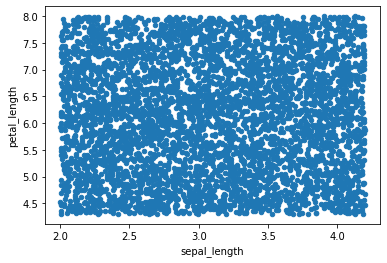

In [71]:
import random

X_rand = []

#Generate random value with sepal length between 4.3 and 8, and petal length betwee 2 and 4.4
for x in range(5000):
  random.seed(x)
  X_rand.append([4.3 + random.random() * 3.7,  2 + random.random() * 2.2])

#Check if the generation is uniform
df_X_rand = pd.DataFrame(X_rand, columns=["petal_length", "sepal_length"])
df_X_rand.plot(kind='scatter', x='sepal_length', y="petal_length")

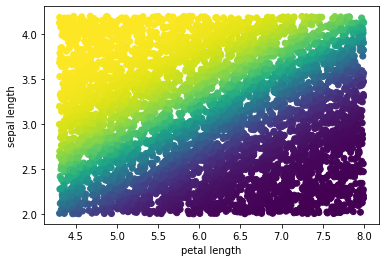

In [79]:
#Predict the probability for each of our random samples
proba_rand = LR_GD.probability(X_rand)

df_rand_proba = pd.DataFrame(X_rand, columns=["petal_length", "sepal_length"])
plt.scatter("petal_length", "sepal_length", data = df_rand_proba, c=proba_rand)
plt.xlabel("petal length")
plt.ylabel("sepal length")

plt.show()

## Part 3: Multi-class Logistic Regression with scikit-learn

1. Load all of the samples from the Iris dataset, that is iris-setosa, iris-versicolor and iris-virginica. Load the petal length and petal width as the features. Assign the class labels 
    1. Iris-setosa = 0
    2. Iris-versicolor = 1
    3. Iris-virginica = 2
2. Use the scikit-learn train_test_split function to split into 30% test and 70% training data
    1. Set the stratify parameter to y. The stratify option will make sure that you get the same split of data as is in the original dataset. I.e. you will get 33% of each of the Iris types in your training and test data.
3. Use the scikit-learn StandardScaler function to apply standard scaling to both training and test data
    1. Plot the scaled data
4. Train an instance of the scikitlearn LogisticRegression algorithm on the provided data
    1. You can use all the default parameters
5. Plot the decision boundary using the supplied plot_decision_boundary function
6. Using sklearn's accuracy_score, calculate the accuracy score on the test data

Scikit-learn's LogisticRegression class has a parameter to control the regularisation. This parameter is C is the inverse of $\lambda$, which is described in the SVM videos. Note that the step above where the data is normalised is hugely important, as regularisation only works properly when data is normalised.
1. Plot the decision boundary above when you set C to smaller and larger values (even 0.01 and 100)
2. Describe what you observe with reference to what you know about regularisation from the material provided

In [92]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('iris_data.csv')
X = df[[' petal_length', 'sepal_length']]
y = df[[' class']]


# Convert iris label into int value
# Iris-setosa: 0 | Iris-versicolor: 1 | Iris-virginica: 2 
y = np.where(y == "Iris-setosa", 0, np.where(y == "Iris-versicolor", 1, 2))


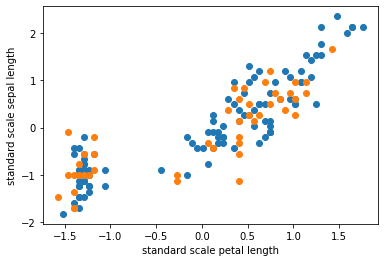

In [98]:
# Split the data between a train and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)

# Fit the model with the training dataset
scaler = StandardScaler()
scaler.fit(X_train)

# Apply a standard scaling to the data
X_test = scaler.transform(X_test)
X_train = scaler.transform(X_train)

# Plot the scale data to check the distribution
plt.scatter(x=X_train[:,0], y=X_train[:,1])
plt.scatter(x=X_test[:,0], y=X_test[:,1])
plt.xlabel("standard scale petal length")
plt.ylabel("standard scale sepal length")
plt.show()

In [94]:
# Create logistic regression model
lr = LogisticRegression()

# Train the model
lr.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [106]:
import matplotlib.pyplot as plt
import numpy as np

def plot_decision_boundary(X, y, model, steps=1000, cmap='Paired'):
    """
    Function to plot the decision boundary and data points of a model.
    Data points are colored based on their actual label.
    """
    cmap = plt.get_cmap(cmap)
    
    # Define region of interest by data limits
    xmin, xmax = X[:,0].min() - 1, X[:,0].max() + 1
    ymin, ymax = X[:,1].min() - 1, X[:,1].max() + 1
    steps = 1000
    x_span = np.linspace(xmin, xmax, steps)
    y_span = np.linspace(ymin, ymax, steps)
    xx, yy = np.meshgrid(x_span, y_span)

    # Make predictions across region of interest
    labels = model.predict(np.c_[xx.ravel(), yy.ravel()])

    # Plot decision boundary in region of interest
    z = labels.reshape(xx.shape)
    
    fig, ax = plt.subplots()
    ax.contourf(xx, yy, z, cmap=cmap, alpha=0.5)

    # Get predicted labels on training data and plot
    ax.scatter(X[:,0], X[:,1], c=y, cmap=cmap, lw=0)
    
    return fig, ax

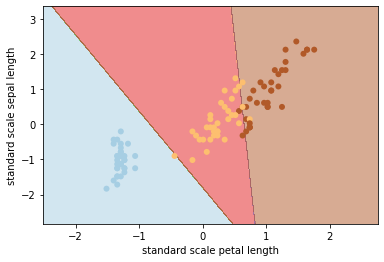

In [107]:
# Plot the decison boundary

plot_decision_boundary(X_train, y_train, lr)
plt.xlabel("standard scale petal length")
plt.ylabel("standard scale sepal length")
plt.show()

In [100]:
from sklearn.metrics import accuracy_score

# Make prediction on the test dataset
y_pred = lr.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9111111111111111


Now, we are going to create new logistic regression model with diffent value fro the parameter C which correspond to the inverse of regularization

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


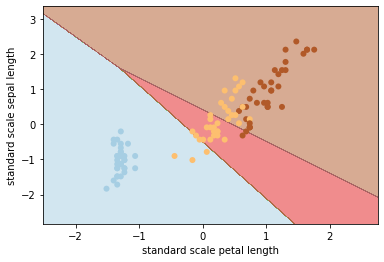

Accuracy: 0.7555555555555555


In [108]:
# Create logistic regression model with a very low value for C
lr2 = LogisticRegression(C = 0.01)

# Train the model
lr2.fit(X_train, y_train)
plot_decision_boundary(X_train, y_train, lr2)
plt.xlabel("standard scale petal length")
plt.ylabel("standard scale sepal length")
plt.show()

# Calculate the accuracy
y_pred2 = lr2.predict(X_test)
accuracy2 = accuracy_score(y_test, y_pred2)
print("Accuracy:", accuracy2)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


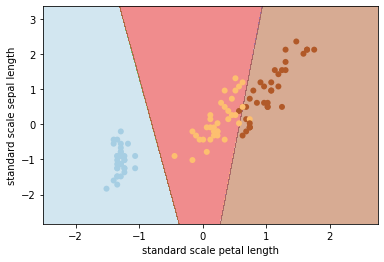

Accuracy: 0.9333333333333333


In [109]:
# Create logistic regression model with a hight value for C
lr3 = LogisticRegression(C = 100)

# Train the model
lr3.fit(X_train, y_train)
plot_decision_boundary(X_train, y_train, lr3)
plt.xlabel("standard scale petal length")
plt.ylabel("standard scale sepal length")
plt.show()

# Calculate the accuracy
y_pred3 = lr3.predict(X_test)
accuracy3 = accuracy_score(y_test, y_pred3)
print("Accuracy:", accuracy3)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


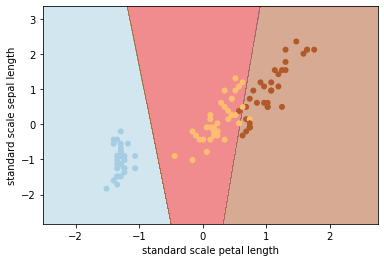

Accuracy: 0.9333333333333333


In [110]:
# Create logistic regression model with a very hight value for C
lr4 = LogisticRegression(C = 1000)

# Train the model
lr4.fit(X_train, y_train)
plot_decision_boundary(X_train, y_train, lr4)
plt.xlabel("standard scale petal length")
plt.ylabel("standard scale sepal length")
plt.show()

# Calculate the accuracy
y_pred4 = lr4.predict(X_test)
accuracy4 = accuracy_score(y_test, y_pred4)
print("Accuracy:", accuracy4)

Describe what you observe with reference to what you know about regularisation from the material provided 

By providing a low value for parameter C, our model is overfitting and the accuracy is reduced.
By providind a big value for C, our model should be underfitting, however its accuracy increases. We can maybe explain that because our model uses a small quantity of data (only 45 samples). By doing the same experimentation with more data we should obtain an underfitting model